### AIM 2: SUBREGIONAL LEVEL ANALYSIS

- [Data visualization](#datavis)
- [Link between COVID-19 deaths and air pollution: Negative binomial fit](#nbf)
    - [pm10](#pm10)
    - [pm25](#pm25)
    - [nox](#nox)
    - [no2](#no2)
    - [o3](#o3)
    - [so2](#so2)
    - [models without Mean_ann_earnings](#mae)
    - [odds ratio](#or)

Import the modules I need for the analysis and the paths where the data are stores, all inclueded in the [conf_files](http://localhost:8888/notebooks/Documents/links%20between%20air%20pollution%20and%20covid19/conf_files.ipynb)

In [6]:
%run conf_files.ipynb

import the dataset needed for the subregional analysis (pop_dens, earning, age, covid_deaths). They are all descibed [here](http://localhost:8888/notebooks/Documents/links%20between%20air%20pollution%20and%20covid19/data.ipynb)

In [7]:
pop_dens = pd.read_csv("%s/2018_official_popDensity.csv" %path)[['Code', '2018 people per sq. km']]
earning = pd.read_csv("%s/ann_earning_2018_perLA.csv" %path)[["Code","Mean_ann_earnings"]]
age = pd.read_csv("%s/processed_median_age_of_population_perLA.csv" %path)[["Code","median_age_2018","Name"]]
covid_deaths = pd.read_csv("%s/covid_deaths_until10April_byAreaCode.csv" %path)

Our interest is in the total number of deaths per subregion, no matter if in hospital at home or elsewhere. The covid_deaths dataset is then updated in order to contain a unique column representing the variable of interest, associated with the are code.

In [8]:
covid_deaths['total_deaths'] = covid_deaths['Home'] + covid_deaths['Hospital'] + covid_deaths['Care home'] + covid_deaths['Hospice'] + covid_deaths['Other communal establishment'] + covid_deaths['Elsewhere']
covid_deaths = covid_deaths[['Area code', 'total_deaths']]
columns=['Code', 'deaths']
covid_deaths.columns = columns
covid_deaths

,Code,deaths
0,E06000001,20
1,E06000002,60
2,E06000003,26
3,E06000004,26
4,E06000005,14
...,...,...
341,W11000025,31
342,W11000028,208
343,W11000029,135
344,W11000030,116


A new dataset is created, by merging the informations contained in the dataset just imported. The aim is having a single dataset with the number of deaths, the mean annual earning, the median age, the population density, the area name and the area code.

In [9]:
all_data = [earning, age, pop_dens, covid_deaths]
merged_covid_dt = reduce(lambda left,right: pd.merge(left,right), all_data)
merged_covid_dt.sort_values(by='Code', inplace=True)

The commas in the '2018 people per sq. km' and 'Mean_ann_earnings' are deleted and the new dataset is saved as csv

In [10]:
merged_covid_dt['2018 people per sq. km'] = [x.replace(',','') for x in merged_covid_dt['2018 people per sq. km']]
merged_covid_dt['2018 people per sq. km'] = merged_covid_dt['2018 people per sq. km'].astype(int)
merged_covid_dt['Mean_ann_earnings'] = [x.replace(',','') for x in merged_covid_dt['Mean_ann_earnings']]
merged_covid_dt['Mean_ann_earnings'] = pd.to_numeric(merged_covid_dt['Mean_ann_earnings'],errors='coerce')
merged_covid_dt.head()
merged_covid_dt.to_csv('data_out/merged_covid_dt.csv')

Now, the dataset [covid_air_dt](http://localhost:8888/notebooks/Documents/links%20between%20air%20pollution%20and%20covid19/data.ipynb#merged_covid_dt) is read. Its creation can be found [here](http://localhost:8888/notebooks/Documents/links%20between%20air%20pollution%20and%20covid19/covid_air_dt_creation.ipynb)

In [11]:
covid_air_dt = pd.read_csv("%s/merged_covidAir_cov_dt_LA.csv" %path_output, na_values='x')
covid_air_dt['X2018.people.per.sq..km'] = [x.replace(',','') for x in covid_air_dt['X2018.people.per.sq..km']]
covid_air_dt['X2018.people.per.sq..km'] = pd.to_numeric(covid_air_dt['X2018.people.per.sq..km'])
covid_air_dt['Mean_ann_earnings'] = covid_air_dt['Mean_ann_earnings'].astype(str)
covid_air_dt['Mean_ann_earnings'] = [x.replace(',','') for x in covid_air_dt['Mean_ann_earnings']]
covid_air_dt['Mean_ann_earnings'] = pd.to_numeric(covid_air_dt['Mean_ann_earnings'],errors='coerce')
covid_air_dt.info()
#only english data
covid_air_dt = covid_air_dt.loc[covid_air_dt['Code'].str.startswith('E')]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               334 non-null    int64  
 1   Code                     334 non-null    object 
 2   deaths                   334 non-null    int64  
 3   X2018.people.per.sq..km  334 non-null    int64  
 4   Mean_ann_earnings        328 non-null    float64
 5   median_age_2018          334 non-null    float64
 6   lat                      334 non-null    float64
 7   lon                      334 non-null    float64
 8   pm25_lon                 334 non-null    float64
 9   pm25_lat                 334 non-null    float64
 10  pm25_val                 334 non-null    float64
 11  no2_lon                  334 non-null    float64
 12  no2_lat                  334 non-null    float64
 13  no2_val                  334 non-null    float64
 14  o3_lon                   3

In [12]:
covid_air_dt.head()

,Unnamed: 0,Code,deaths,X2018.people.per.sq..km,Mean_ann_earnings,median_age_2018,lat,lon,pm25_lon,pm25_lat,...,o3_val,pm10_lon,pm10_lat,pm10_val,so2_lon,so2_lat,so2_val,nox_lon,nox_lat,nox_val
0,1,E06000001,20,997,25985.0,41.8,54.685728,-1.209370,-1.210453,54.684977,...,5.303858,-1.210453,54.684977,11.506778,-1.210453,54.684977,1.575561,-1.210453,54.684977,17.730895
1,2,E06000002,60,2608,22878.0,36.2,54.576042,-1.234405,-1.234211,54.576387,...,4.251802,-1.234211,54.576387,12.561928,-1.234211,54.576387,3.133286,-1.234211,54.576387,29.296034
2,3,E06000003,26,558,23236.0,45.0,54.567906,-1.005496,-1.005466,54.567534,...,6.851500,-1.005466,54.567534,12.855827,-1.005466,54.567534,0.998864,-1.005466,54.567534,9.983241
3,4,E06000004,26,962,26622.0,40.4,54.564094,-1.312916,-1.310219,54.564262,...,5.050632,-1.310219,54.564262,12.251130,-1.310219,54.564262,1.934329,-1.310219,54.564262,21.440737
4,5,E06000005,14,540,26908.0,43.1,54.524208,-1.555581,-1.556564,54.523176,...,5.198811,-1.556564,54.523176,11.129635,-1.556564,54.523176,1.129034,-1.556564,54.523176,15.098272


<a id='datavis'></a>
### Visualize the distribution of each variable

Variables of interest are standardized in order to visualize them all together.
The standardized version of the dataset is saved in covid_air_dt_vis

In [13]:
covid_air_dt_vis = covid_air_dt[['deaths', 'X2018.people.per.sq..km',
       'Mean_ann_earnings', 'median_age_2018', 'pm25_val','no2_val','o3_val','pm10_val','so2_val','nox_val']]
for i in covid_air_dt_vis:
    covid_air_dt_vis[i] = (covid_air_dt_vis[i]-np.nanmean(covid_air_dt_vis[i]))/np.nanstd(covid_air_dt_vis[i])
covid_air_dt_vis
covid_air_dt.head()

<ipython-input-13-f92e6b069f24>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_air_dt_vis[i] = (covid_air_dt_vis[i]-np.nanmean(covid_air_dt_vis[i]))/np.nanstd(covid_air_dt_vis[i])


,Unnamed: 0,Code,deaths,X2018.people.per.sq..km,Mean_ann_earnings,median_age_2018,lat,lon,pm25_lon,pm25_lat,...,o3_val,pm10_lon,pm10_lat,pm10_val,so2_lon,so2_lat,so2_val,nox_lon,nox_lat,nox_val
0,1,E06000001,20,997,25985.0,41.8,54.685728,-1.209370,-1.210453,54.684977,...,5.303858,-1.210453,54.684977,11.506778,-1.210453,54.684977,1.575561,-1.210453,54.684977,17.730895
1,2,E06000002,60,2608,22878.0,36.2,54.576042,-1.234405,-1.234211,54.576387,...,4.251802,-1.234211,54.576387,12.561928,-1.234211,54.576387,3.133286,-1.234211,54.576387,29.296034
2,3,E06000003,26,558,23236.0,45.0,54.567906,-1.005496,-1.005466,54.567534,...,6.851500,-1.005466,54.567534,12.855827,-1.005466,54.567534,0.998864,-1.005466,54.567534,9.983241
3,4,E06000004,26,962,26622.0,40.4,54.564094,-1.312916,-1.310219,54.564262,...,5.050632,-1.310219,54.564262,12.251130,-1.310219,54.564262,1.934329,-1.310219,54.564262,21.440737
4,5,E06000005,14,540,26908.0,43.1,54.524208,-1.555581,-1.556564,54.523176,...,5.198811,-1.556564,54.523176,11.129635,-1.556564,54.523176,1.129034,-1.556564,54.523176,15.098272


The variable Code is added again and the dataset is melted and used for visualization

In [14]:
covid_air_dt_vis['Code']=covid_air_dt['Code']
covid_air_dt_vis
covid_air_dt_vis_new=pd.melt(covid_air_dt_vis, id_vars='Code')
covid_air_dt_vis_new

<ipython-input-14-cfc4727d0da4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_air_dt_vis['Code']=covid_air_dt['Code']


,Code,variable,value
0,E06000001,deaths,-0.505787
1,E06000002,deaths,0.284030
2,E06000003,deaths,-0.387314
3,E06000004,deaths,-0.387314
4,E06000005,deaths,-0.624259
...,...,...,...
3115,E09000029,nox_val,0.434296
3116,E09000030,nox_val,-0.321104
3117,E09000031,nox_val,-0.686803
3118,E09000032,nox_val,1.683366


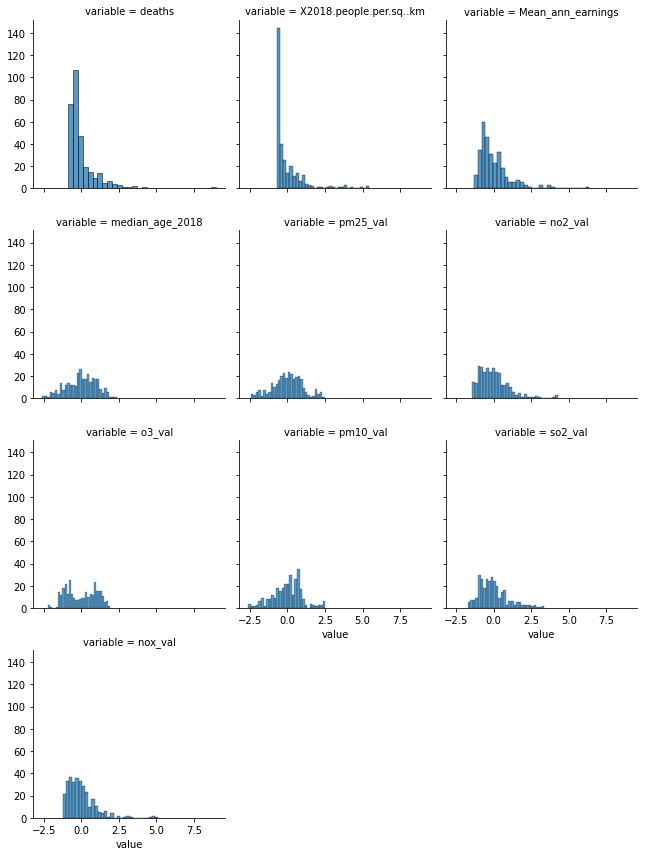

In [15]:
g = sns.FacetGrid(covid_air_dt_vis_new, col='variable', col_wrap=3)
g.map(sns.histplot, 'value', bins=30)
g.add_legend()

From the plot we can see thah
- all pollutants seem to have very different value according to the location
- population density and number of deaths have similar distribution, skewed on the right
- mean annual earning has similar distribution to deaths and number of deaths but less skewed

<a id='nbf'></a>
### Fit Negative Binomial regression model to the data

In [16]:
covid_air_dt.columns
covid_air_dt.rename(columns={'X2018.people.per.sq..km':'X2018_people_per_sq_km'}, inplace=True)
covid_air_dt

,Unnamed: 0,Code,deaths,X2018_people_per_sq_km,Mean_ann_earnings,median_age_2018,lat,lon,pm25_lon,pm25_lat,...,o3_val,pm10_lon,pm10_lat,pm10_val,so2_lon,so2_lat,so2_val,nox_lon,nox_lat,nox_val
0,1,E06000001,20,997,25985.0,41.8,54.685728,-1.209370,-1.210453,54.684977,...,5.303858,-1.210453,54.684977,11.506778,-1.210453,54.684977,1.575561,-1.210453,54.684977,17.730895
1,2,E06000002,60,2608,22878.0,36.2,54.576042,-1.234405,-1.234211,54.576387,...,4.251802,-1.234211,54.576387,12.561928,-1.234211,54.576387,3.133286,-1.234211,54.576387,29.296034
2,3,E06000003,26,558,23236.0,45.0,54.567906,-1.005496,-1.005466,54.567534,...,6.851500,-1.005466,54.567534,12.855827,-1.005466,54.567534,0.998864,-1.005466,54.567534,9.983241
3,4,E06000004,26,962,26622.0,40.4,54.564094,-1.312916,-1.310219,54.564262,...,5.050632,-1.310219,54.564262,12.251130,-1.310219,54.564262,1.934329,-1.310219,54.564262,21.440737
4,5,E06000005,14,540,26908.0,43.1,54.524208,-1.555581,-1.556564,54.523176,...,5.198811,-1.556564,54.523176,11.129635,-1.556564,54.523176,1.129034,-1.556564,54.523176,15.098272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,E09000029,74,4665,33941.0,39.2,51.357511,-0.173640,-0.171687,51.357196,...,10.027468,-0.171687,51.357196,16.077207,-0.171687,51.357196,1.287469,-0.171687,51.357196,24.364964
308,309,E09000030,105,16057,45798.0,31.3,51.128863,1.298669,1.295936,51.130784,...,12.694513,1.295936,51.130784,14.416563,1.295936,51.130784,1.055117,1.295936,51.130784,15.414923
309,310,E09000031,116,7130,32167.0,34.9,51.198159,1.016517,1.015878,51.198612,...,13.932249,1.015878,51.198612,14.637977,1.015878,51.198612,0.703831,1.015878,51.198612,11.082102
310,311,E09000032,112,9528,57605.0,33.9,51.457027,-0.193261,-0.195036,51.457375,...,6.747214,-0.195036,51.457375,18.598633,-0.195036,51.457375,1.645714,-0.195036,51.457375,39.164051


<a id='pm10'></a>
##### investigate the impact of particular matter with an aerodynamic diameter < 10.0 μm (pm10) 
Here a nagative binomial regression model is fitted. deaths is the dependent variable and the value of pm10 is used as regressor. Population density, mean annual earnings and median age are included in the model to account for their counfonding effect.

In [17]:
pm10_deaths = smf.glm(formula = "deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + pm10_val", data=covid_air_dt, family=sm.families.NegativeBinomial(alpha=0.4741584)).fit()
print(pm10_deaths.summary())
y, X = dmatrices('deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + pm10_val', data=covid_air_dt, return_type='dataframe')
vif_deaths_pm10 = pd.DataFrame()
vif_deaths_pm10['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_deaths_pm10['variable'] = X.columns
print(vif_deaths_pm10)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 deaths   No. Observations:                  306
Model:                            GLM   Df Residuals:                      301
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1393.8
Date:                Mon, 27 Sep 2021   Deviance:                       327.94
Time:                        12:27:50   Pearson chi2:                     362.
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7

pm10_val and Mean_ann_earnings are not statistically significant. 
The variance inflation factor is computed. It measures how much the variance (or standard error) of the estimated regression coefficient is inflated due to collinearity. There is no evident collinearity

<a id='pm25'></a>
##### investigate the impact of particular matter with an aerodynamic diameter < 2.5 μm (pm25) 
Here a nagative binomial regression model is fitted. deaths is the dependent variable and the value of pm25 is used as regressor. Population density, mean annual earnings and median age are included in the model to account for their counfonding effect.

In [18]:
pm25_deaths = smf.glm(formula = "deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + pm25_val", data=covid_air_dt, family=sm.families.NegativeBinomial(alpha = 0.4764173)).fit()
print(pm25_deaths.summary())
y, X = dmatrices('deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + pm25_val', data=covid_air_dt, return_type='dataframe')
vif_deaths_pm25 = pd.DataFrame()
vif_deaths_pm25['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_deaths_pm25['variable'] = X.columns
print(vif_deaths_pm25)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 deaths   No. Observations:                  306
Model:                            GLM   Df Residuals:                      301
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1394.6
Date:                Mon, 27 Sep 2021   Deviance:                       328.06
Time:                        12:27:50   Pearson chi2:                     364.
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6

Similar as before, again mean annual earnings is not statistically significant and neither pm25_value. There is no collinearity

<a id='nox'></a>
##### investigate the impact of nitrogen oxides (nox)
Here a nagative binomial regression model is fitted. deaths is the dependent variable and the value of nox is used as regressor. Population density, mean annual earnings and median age are included in the model to account for their counfonding effect.

In [28]:
nox_deaths = smf.glm(formula = "deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + nox_val", data=covid_air_dt, family=sm.families.NegativeBinomial(alpha=0.4666356)).fit()
print(nox_deaths.summary())
y, X = dmatrices('deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + nox_val', data=covid_air_dt, return_type='dataframe')
vif_deaths_nox = pd.DataFrame()
vif_deaths_nox['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_deaths_nox['variable'] = X.columns
print(vif_deaths_nox)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 deaths   No. Observations:                  306
Model:                            GLM   Df Residuals:                      301
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1391.4
Date:                Mon, 27 Sep 2021   Deviance:                       328.03
Time:                        12:40:01   Pearson chi2:                     388.
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

In [30]:
print("unit increase of NOX :", np.exp(0.0160))

unit increase of NOX : 1.016128685406095


Mean_ann_earnings is not statistically significant.
nox has a significant effect on the number of deaths. For a unit increase in the value of nox, the expected number of deaths increas by 1.6%. There is not collinearity

<a id='no2'></a>
##### investigate the impact of nitrogen dioxide (NO2)
Here a nagative binomial regression model is fitted. deaths is the dependent variable and the value of NO2 is used as regressor. Population density, mean annual earnings and median age are included in the model to account for their counfonding effect.

In [31]:
no2_deaths = smf.glm(formula = "deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + no2_val", data=covid_air_dt, family=sm.families.NegativeBinomial(alpha = 0.4636069)).fit()
print(no2_deaths.summary())
y, X = dmatrices('deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + no2_val', data=covid_air_dt, return_type='dataframe')
vif_deaths_no2 = pd.DataFrame()
vif_deaths_no2['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_deaths_no2['variable'] = X.columns
print(vif_deaths_no2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 deaths   No. Observations:                  306
Model:                            GLM   Df Residuals:                      301
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1390.4
Date:                Mon, 27 Sep 2021   Deviance:                       327.97
Time:                        12:43:03   Pearson chi2:                     397.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

In [32]:
print("unit increase of NO2 :", np.exp(0.0296))

unit increase of NO2 : 1.0300424345653076


Mean_ann_earnings is not statistically significant. 
no2_val has a significant effect. For a unit increase of NO2 level, the expected number of deaths increase of a 3%. 
There is no collinearity

<a id='o3'></a>
##### investigate the impact of ozone (O3)
Here a nagative binomial regression model is fitted. deaths is the dependent variable and the value of O3 is used as regressor. Population density, mean annual earnings and median age are included in the model to account for their counfonding effect.

In [26]:
o3_deaths = smf.glm(formula = "deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + o3_val", data=covid_air_dt, family=sm.families.NegativeBinomial(alpha=0.4668534)).fit()
print(o3_deaths.summary())
y, X = dmatrices('deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + o3_val', data=covid_air_dt, return_type='dataframe')
vif_deaths_o3 = pd.DataFrame()
vif_deaths_o3['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_deaths_o3['variable'] = X.columns
print(vif_deaths_o3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 deaths   No. Observations:                  306
Model:                            GLM   Df Residuals:                      301
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1391.3
Date:                Mon, 27 Sep 2021   Deviance:                       327.67
Time:                        12:35:32   Pearson chi2:                     365.
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6

In [25]:
print("unit increase of o3 :", np.exp(-0.0369))

unit increase of o3 : 0.9637725077811297


only Mean_ann_earnings is not statistically significant. O3 is significant. 
A unit increase in o3 brings to a decreasing of 4% of the expected number of deaths. There is no collinearity

<a id='so2'></a>
##### investigate the impact of Sulfur dioxide (SO2)
Here a nagative binomial regression model is fitted. deaths is the dependent variable and the value of SO2 is used as regressor. Population density, mean annual earnings and median age are included in the model to account for their counfonding effect.

In [33]:
so2_deaths = smf.glm(formula = "deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + so2_val", data=covid_air_dt, family=sm.families.NegativeBinomial(alpha=0.4697041)).fit()
print(so2_deaths.summary())
y, X = dmatrices('deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + so2_val', data=covid_air_dt, return_type='dataframe')
vif_deaths_so2 = pd.DataFrame()
vif_deaths_so2['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_deaths_so2['variable'] = X.columns
print(vif_deaths_so2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 deaths   No. Observations:                  306
Model:                            GLM   Df Residuals:                      301
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1392.4
Date:                Mon, 27 Sep 2021   Deviance:                       328.05
Time:                        12:44:53   Pearson chi2:                     392.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

In [34]:
print("unit increase of o3 :", np.exp(0.2016))

unit increase of o3 : 1.2233585668029012


Mean_ann_earnings is not significant. For a unit increase of so2 level the expected number of deaths increases by 22%. There is no collinearity

<a id='mae'></a>
##### Fit the same models without the variable Mean_ann_earnings because not significant

In [36]:
#We note that annual earnings in our models is not significant. We therefore proceed to remove this variable.
o3_deaths_nb_red = smf.glm(formula = "deaths ~ X2018_people_per_sq_km + median_age_2018 + o3_val", data=covid_air_dt, family=sm.families.NegativeBinomial(alpha=0.4621072)).fit()
print(o3_deaths_nb_red.summary())
y, X = dmatrices('deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + o3_val', data=covid_air_dt, return_type='dataframe')
vif_deaths_nb_red_pm10 = pd.DataFrame()
vif_deaths_nb_red_pm10['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_deaths_nb_red_pm10['variable'] = X.columns

so2_deaths_nb_red = smf.glm(formula = "deaths ~ X2018_people_per_sq_km + median_age_2018 + so2_val", data=covid_air_dt, family=sm.families.NegativeBinomial(alpha=0.4638219)).fit()
print(so2_deaths_nb_red.summary())
y, X = dmatrices('deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + so2_val', data=covid_air_dt, return_type='dataframe')
vif_deaths_nb_red_so2 = pd.DataFrame()
vif_deaths_nb_red_so2['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_deaths_nb_red_so2['variable'] = X.columns

no2_deaths_nb_red = smf.glm(formula = "deaths ~ X2018_people_per_sq_km + median_age_2018 + no2_val", data=covid_air_dt, family=sm.families.NegativeBinomial(alpha=0.4582951)).fit()
print(no2_deaths_nb_red.summary())
y, X = dmatrices('deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + no2_val', data=covid_air_dt, return_type='dataframe')
vif_deaths_nb_red_no2 = pd.DataFrame()
vif_deaths_nb_red_no2['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_deaths_nb_red_no2['variable'] = X.columns

nox_deaths_nb_red = smf.glm(formula = "deaths ~ X2018_people_per_sq_km + median_age_2018 + nox_val", data=covid_air_dt, family=sm.families.NegativeBinomial(alpha=0.461042)).fit()
print(nox_deaths_nb_red.summary())
y, X = dmatrices('deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + nox_val', data=covid_air_dt, return_type='dataframe')
vif_deaths_nb_red_nox = pd.DataFrame()
vif_deaths_nb_red_nox['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_deaths_nb_red_nox['variable'] = X.columns

pm25_deaths_nb_red = smf.glm(formula = "deaths ~ X2018_people_per_sq_km + median_age_2018 + pm25_val", data=covid_air_dt, family=sm.families.NegativeBinomial(alpha=0.4701457)).fit()
print(pm25_deaths_nb_red.summary())
y, X = dmatrices('deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + pm25_val', data=covid_air_dt, return_type='dataframe')
vif_deaths_nb_red_pm25 = pd.DataFrame()
vif_deaths_nb_red_pm25['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_deaths_nb_red_pm25['variable'] = X.columns

pm10_deaths_nb_red = smf.glm(formula = "deaths ~ X2018_people_per_sq_km + median_age_2018 + pm10_val", data=covid_air_dt, family=sm.families.NegativeBinomial(alpha=0.4686036)).fit()
print(pm10_deaths_nb_red.summary())
y, X = dmatrices('deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + pm10_val', data=covid_air_dt, return_type='dataframe')
vif_deaths_nb_red_pm10 = pd.DataFrame()
vif_deaths_nb_red_pm10['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_deaths_nb_red_pm10['variable'] = X.columns

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 deaths   No. Observations:                  312
Model:                            GLM   Df Residuals:                      308
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1417.4
Date:                Mon, 27 Sep 2021   Deviance:                       334.06
Time:                        12:50:43   Pearson chi2:                     369.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6

All the regressors in every model are significant, except for pm10_value and m25_value

<a id='or'></a>
##### compute and visualize odds ratio

In [42]:
deaths_pm10_or = pd.concat([np.exp(pm10_deaths.params),np.exp(pm10_deaths.conf_int()[0]),np.exp(pm10_deaths.conf_int()[1]),pm10_deaths.pvalues], axis=1,
                       keys=['or', '0.025', '0.975', 'pvalue'])
deaths_o3_or = pd.concat([np.exp(o3_deaths.params),np.exp(o3_deaths.conf_int()[0]),np.exp(o3_deaths.conf_int()[1]),o3_deaths.pvalues], axis=1,
                       keys=['or', '0.025', '0.975', 'pvalue'])
#deaths_so2_or = pd.concat([np.exp(so2_deaths.params),np.exp(so2_deaths.conf_int()[0]),np.exp(so2_deaths.conf_int()[1]),so2_deaths.pvalues], axis=1,
#                       keys=['or', '0.025', '0.975', 'pvalue'])
deaths_no2_or = pd.concat([np.exp(no2_deaths.params),np.exp(no2_deaths.conf_int()[0]),np.exp(no2_deaths.conf_int()[1]),no2_deaths.pvalues], axis=1,
                       keys=['or', '0.025', '0.975', 'pvalue'])
deaths_nox_or = pd.concat([np.exp(nox_deaths.params),np.exp(nox_deaths.conf_int()[0]),np.exp(nox_deaths.conf_int()[1]),nox_deaths.pvalues], axis=1,
                       keys=['or', '0.025', '0.975', 'pvalue'])
deaths_pm25_or = pd.concat([np.exp(pm25_deaths.params),np.exp(pm25_deaths.conf_int()[0]),np.exp(pm25_deaths.conf_int()[1]),pm25_deaths.pvalues], axis=1,
                       keys=['or', '0.025', '0.975', 'pvalue'])
LA_covid_onlyPoll = pd.concat([deaths_pm10_or.iloc[deaths_pm10_or.shape[0]-1],
                               deaths_o3_or.iloc[deaths_o3_or.shape[0]-1],
                               #deaths_so2_or.iloc[deaths_so2_or.shape[0]-1],
                               deaths_no2_or.iloc[deaths_no2_or.shape[0]-1],
                               deaths_nox_or.iloc[deaths_nox_or.shape[0]-1],
                               deaths_pm25_or.iloc[deaths_pm25_or.shape[0]-1]], axis=1)
LA_covid_onlyPoll = LA_covid_onlyPoll.transpose()
LA_covid_onlyPoll['significance'] = np.where(LA_covid_onlyPoll['pvalue'] < 0.05, 'p-value < 0.05', 'p-value > 0.05')
LA_covid_onlyPoll['names'] = LA_covid_onlyPoll.index.values 
LA_covid_onlyPoll
#LA_covid_onlyPoll.to_csv("data_out/LA_covid_onlyPoll_preL_AP2018.csv")

,or,0.025,0.975,pvalue,significance,names
pm10_val,0.964970,0.927852,1.003573,0.074787,p-value > 0.05,pm10_val
o3_val,0.963776,0.940417,0.987714,0.003204,p-value < 0.05,o3_val
no2_val,1.030054,1.010645,1.049836,0.002281,p-value < 0.05,no2_val
nox_val,1.016148,1.005221,1.027194,0.003685,p-value < 0.05,nox_val
pm25_val,0.961830,0.904304,1.023014,0.216147,p-value > 0.05,pm25_val


In [45]:
LA_covid_onlyPoll = LA_covid_onlyPoll.sort_values(by=['or'], ascending = False)
LA_covid_onlyPoll

,or,0.025,0.975,pvalue,significance,names
no2_val,1.030054,1.010645,1.049836,0.002281,p-value < 0.05,no2_val
nox_val,1.016148,1.005221,1.027194,0.003685,p-value < 0.05,nox_val
pm10_val,0.964970,0.927852,1.003573,0.074787,p-value > 0.05,pm10_val
o3_val,0.963776,0.940417,0.987714,0.003204,p-value < 0.05,o3_val
pm25_val,0.961830,0.904304,1.023014,0.216147,p-value > 0.05,pm25_val


From this table we can easily see the impact of the pollutants on the expected number of deaths. pm10 and pm25 cannote be interpreted as their pvalue is greater than 0.05. no2 and nox are risk factor while o3 is a protective factor.

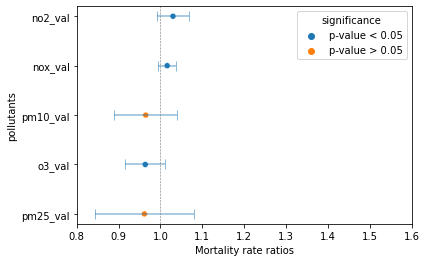

In [47]:
fig1 = plt.figure()
ax = sns.scatterplot(x="or", y="names", data=LA_covid_onlyPoll, hue="significance")
plt.xlim(0.8, 1.6)
plt.axvline(x=1,linestyle ="--", linewidth=0.6, color = 'gray')
xerr = LA_covid_onlyPoll['0.975'] - LA_covid_onlyPoll['0.025']
plt.errorbar(LA_covid_onlyPoll['or'], LA_covid_onlyPoll['names'], xerr = xerr, fmt = 'none', capsize=5, alpha=0.5)
plt.xlabel("Mortality rate ratios")
plt.ylabel("pollutants")


plt.show()

In [86]:
cases_LA_raw = pd.read_csv("https://raw.githubusercontent.com/M1gus/AirPollutionCOVID19/gh-pages/data/coronavirus-cases_latest-18_5_2020.csv")
cases_LA_dt = cases_LA_raw.loc[cases_LA_raw["Specimen date"]== "2020-04-10",["Area code", "Cumulative lab-confirmed cases"]]
cases_LA_dt.agg = cases_LA_dt.groupby(['Area code']).mean()


In [223]:
deaths_LA_dt = pd.read_csv("https://raw.githubusercontent.com/M1gus/AirPollutionCOVID19/gh-pages/data_output/merged_covidAir_cov_dt_LA.csv", na_values = "x")
deaths_LA_dt.columns
deaths_LA_dt['X2018.people.per.sq..km'] = [x.replace(',','') for x in deaths_LA_dt['X2018.people.per.sq..km']]
deaths_LA_dt['X2018.people.per.sq..km'] = pd.to_numeric(deaths_LA_dt['X2018.people.per.sq..km'])
deaths_LA_dt['Mean_ann_earnings'] = [str(x).replace(',','') for x in deaths_LA_dt['Mean_ann_earnings']]
deaths_LA_dt['Mean_ann_earnings'] = pd.to_numeric(deaths_LA_dt['Mean_ann_earnings'],errors='coerce')
#deaths_LA_dt.info()
cases_deaths_LA_dt = pd.merge(deaths_LA_dt, cases_LA_dt.agg, left_on = "Code", right_on = "Area code")
#cases_LA_dt.agg.head()
cases_deaths_LA_dt.shape
#cases_deaths_LA_dt.columns

(301, 27)

<AxesSubplot:xlabel='Cumulative lab-confirmed cases', ylabel='Count'>

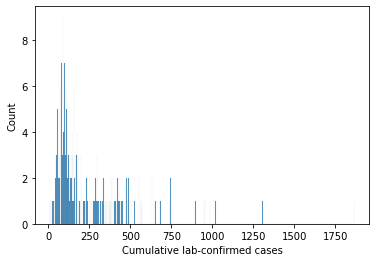

In [231]:
sns.histplot(cases_deaths_LA_dt['Cumulative lab-confirmed cases'], bins=1000, kde=False)
#DA MIGLIORARE

In [232]:

#fit negative binomial
cases_deaths_LA_dt.rename(columns={'X2018.people.per.sq..km':'X2018_people_per_sq_km', 'Cumulative lab-confirmed cases':'Cumulative_lab_confirmed_cases'}, inplace=True)

cases_pm25 = smf.glm(formula = "Cumulative_lab_confirmed_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + pm25_val", data=cases_deaths_LA_dt, family=sm.families.NegativeBinomial()).fit()
print(cases_pm25.summary())
y, X = dmatrices('Cumulative_lab_confirmed_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + pm25_val', data=cases_deaths_LA_dt, return_type='dataframe')
vif_cases_pm25 = pd.DataFrame()
vif_cases_pm25['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_cases_pm25['variable'] = X.columns

cases_pm10 = smf.glm(formula = "Cumulative_lab_confirmed_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + pm10_val", data=cases_deaths_LA_dt, family=sm.families.NegativeBinomial()).fit()
print(cases_pm10.summary())
y, X = dmatrices('Cumulative_lab_confirmed_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + pm10_val', data=cases_deaths_LA_dt, return_type='dataframe')
vif_cases_pm10 = pd.DataFrame()
vif_cases_pm10['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_cases_pm10['variable'] = X.columns

cases_nox = smf.glm(formula = "Cumulative_lab_confirmed_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + nox_val", data=cases_deaths_LA_dt, family=sm.families.NegativeBinomial()).fit()
print(cases_nox.summary())
y, X = dmatrices('Cumulative_lab_confirmed_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + nox_val', data=cases_deaths_LA_dt, return_type='dataframe')
vif_cases_nox = pd.DataFrame()
vif_cases_nox['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_cases_nox['variable'] = X.columns

cases_no2 = smf.glm(formula = "Cumulative_lab_confirmed_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + no2_val", data=cases_deaths_LA_dt, family=sm.families.NegativeBinomial()).fit()
print(cases_no2.summary())
y, X = dmatrices('Cumulative_lab_confirmed_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + no2_val', data=cases_deaths_LA_dt, return_type='dataframe')
vif_cases_no2 = pd.DataFrame()
vif_cases_no2['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_cases_no2['variable'] = X.columns

cases_o3 = smf.glm(formula = "Cumulative_lab_confirmed_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + o3_val", data=cases_deaths_LA_dt, family=sm.families.NegativeBinomial()).fit()
print(cases_o3.summary())
y, X = dmatrices('Cumulative_lab_confirmed_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + o3_val', data=cases_deaths_LA_dt, return_type='dataframe')
vif_cases_o3 = pd.DataFrame()
vif_cases_o3['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_cases_o3['variable'] = X.columns

cases_so2 = smf.glm(formula = "Cumulative_lab_confirmed_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + so2_val", data=cases_deaths_LA_dt, family=sm.families.NegativeBinomial()).fit()
print(cases_so2.summary())
y, X = dmatrices('Cumulative_lab_confirmed_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + so2_val', data=cases_deaths_LA_dt, return_type='dataframe')
vif_cases_o3 = pd.DataFrame()
vif_cases_o3['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_cases_o3['variable'] = X.columns


                       Generalized Linear Model Regression Results                        
Dep. Variable:     Cumulative_lab_confirmed_cases   No. Observations:                  295
Model:                                        GLM   Df Residuals:                      290
Model Family:                    NegativeBinomial   Df Model:                            4
Link Function:                                log   Scale:                          1.0000
Method:                                      IRLS   Log-Likelihood:                -1848.5
Date:                            Mon, 13 Sep 2021   Deviance:                       115.82
Time:                                    17:11:00   Pearson chi2:                     134.
No. Iterations:                                 9                                         
Covariance Type:                        nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]

In [242]:
### produce an html file for supplementary table 2
from stargazer.stargazer import Stargazer
star_cases = Stargazer([cases_pm25, cases_pm10, cases_nox, cases_no2, cases_o3, cases_so2])
#star.custom_columns=(['modelll'])
star_cases.custom_columns(['pm10', 'pm25', 'nox', 'no2', 'o3', 'so2'], [1,1,1,1,1,1])


ValueError: DataFrame constructor not properly called!

In [233]:
cases_pm10_or = pd.concat([np.exp(cases_pm10.params),np.exp(cases_pm10.conf_int()[0]),np.exp(cases_pm10.conf_int()[1]),cases_pm10.pvalues], axis=1,
                       keys=['or', '25', '95', 'pvalue'])
cases_o3_or = pd.concat([np.exp(cases_o3.params),np.exp(cases_o3.conf_int()[0]),np.exp(cases_o3.conf_int()[1]),cases_o3.pvalues], axis=1,
                       keys=['or', '25', '95', 'pvalue'])
cases_no2_or = pd.concat([np.exp(cases_no2.params),np.exp(cases_no2.conf_int()[0]),np.exp(cases_no2.conf_int()[1]),cases_no2.pvalues], axis=1,
                       keys=['or', '25', '95', 'pvalue'])
cases_nox_or = pd.concat([np.exp(cases_nox.params),np.exp(cases_nox.conf_int()[0]),np.exp(cases_nox.conf_int()[1]),cases_nox.pvalues], axis=1,
                       keys=['or', '25', '95', 'pvalue'])
cases_pm25_or = pd.concat([np.exp(cases_pm25.params),np.exp(cases_pm25.conf_int()[0]),np.exp(cases_pm25.conf_int()[1]),cases_pm25.pvalues], axis=1,
                       keys=['or', '25', '95', 'pvalue'])
LA_covid_cases_onlyPoll = pd.concat([cases_pm10_or.iloc[cases_pm10_or.shape[0]-1],
                               cases_o3_or.iloc[cases_o3_or.shape[0]-1],
                               cases_no2_or.iloc[cases_no2_or.shape[0]-1],
                               cases_nox_or.iloc[cases_nox_or.shape[0]-1],
                               cases_pm25_or.iloc[cases_pm25_or.shape[0]-1]], axis=1)
LA_covid_cases_onlyPoll = LA_covid_cases_onlyPoll.transpose()
LA_covid_cases_onlyPoll['significance'] = np.where(LA_covid_cases_onlyPoll['pvalue'] < 0.05, 'p-value < 0.05', 'p-value > 0.05')
LA_covid_cases_onlyPoll['names'] = LA_covid_cases_onlyPoll.index.values 
LA_covid_cases_onlyPoll
LA_covid_cases_onlyPoll.to_csv("data_out/LA_covid_CASES_onlyPoll_preL_2018AP.csv")
LA_covid_cases_onlyPoll

,or,25,95,pvalue,significance,names
pm10_val,0.934624,0.882928,0.989346,0.019863,p-value < 0.05,pm10_val
o3_val,0.948779,0.914955,0.983853,0.004528,p-value < 0.05,o3_val
no2_val,1.030444,1.000492,1.061293,0.046299,p-value < 0.05,no2_val
nox_val,1.017530,1.000149,1.035213,0.048053,p-value < 0.05,nox_val
pm25_val,0.907966,0.830480,0.992681,0.033891,p-value < 0.05,pm25_val


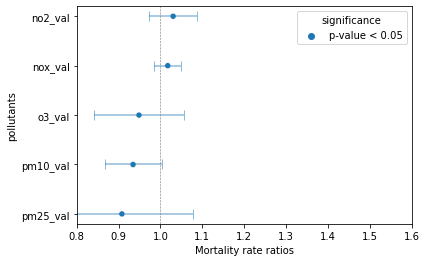

In [234]:
LA_covid_cases_onlyPoll = LA_covid_cases_onlyPoll.sort_values(by=['or'], ascending = False)
fig1 = plt.figure()
ax = sns.scatterplot(x="or", y="names", data=LA_covid_cases_onlyPoll, hue="significance")
plt.xlim(0.8, 1.6)
plt.axvline(x=1,linestyle ="--", linewidth=0.6, color = 'gray')
plt.xlabel("Mortality rate ratios")
plt.ylabel("pollutants")

xerr = LA_covid_onlyPoll['75'] - LA_covid_onlyPoll['25']
#colour = np.where(LA_covid_onlyPoll["significance"] == "p-value < 0.05", "blue", "gray")
plt.errorbar(LA_covid_cases_onlyPoll['or'], LA_covid_cases_onlyPoll['names'], xerr = xerr, fmt = 'none', capsize=5, alpha=0.5)

plt.show()

In [238]:
star_cases_onlyPoll = LA_covid_cases_onlyPoll.to_html("LA_covid_cases_onlyPoll.html")
star_cases_onlyPoll

In [48]:
from functools import reduce
no2_2014 = pd.read_csv("%s/raw_mapno22014.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'no22014'])
no2_2015 = pd.read_csv("%s/raw_mapno22015.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'no22015'])
no2_2016 = pd.read_csv("%s/raw_mapno22016.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'no22016'])
no2_2017 = pd.read_csv("%s/raw_mapno22017.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'no22017'])
no2_2018 = pd.read_csv("%s/raw_mapno22018.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'no22018'])
all_data = [no2_2014, no2_2015, no2_2016, no2_2017, no2_2018]
no2_5y = reduce(lambda left,right: pd.merge(left,right,on='ukgridcode'), all_data)
no2_5y['no2_5yAvg'] = ((no2_2014.no22014+no2_2015.no22015+no2_2016.no22016+no2_2017.no22017+no2_2018.no22018)/5)
no2_5y = no2_5y[['ukgridcode', 'no22018', 'no2_5yAvg']]

In [49]:
nox_2014 = pd.read_csv("%s/raw_mapnox2014.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'nox2014'])
nox_2015 = pd.read_csv("%s/raw_mapnox2015.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'nox2015'])
nox_2016 = pd.read_csv("%s/raw_mapnox2016.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'nox2016'])
nox_2017 = pd.read_csv("%s/raw_mapnox2017.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'nox2017'])
nox_2018 = pd.read_csv("%s/raw_mapnox2018.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'nox2018'])
all_data = [nox_2014, nox_2015, nox_2016, nox_2017, nox_2018]
nox_5y = reduce(lambda left,right: pd.merge(left,right,on='ukgridcode'), all_data)
nox_5y['nox_5yAvg'] = ((nox_2014.nox2014+nox_2015.nox2015+nox_2016.nox2016+nox_2017.nox2017+nox_2018.nox2018)/5)
nox_5y = nox_5y[['ukgridcode', 'nox2018', 'nox_5yAvg']]
nox_5y

,ukgridcode,nox2018,nox_5yAvg
0,54291,NaN,NaN
1,54292,NaN,NaN
2,54294,NaN,NaN
3,54979,NaN,NaN
4,54980,NaN,NaN
...,...,...,...
281797,892960,NaN,NaN
281798,892961,NaN,NaN
281799,892962,NaN,NaN
281800,893649,NaN,NaN


In [50]:
pm25_2014 = pd.read_csv("%s/raw_mappm252014.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'pm252014g'])
pm25_2015 = pd.read_csv("%s/raw_mappm252015.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'pm252015g'])
pm25_2016 = pd.read_csv("%s/raw_mappm252016.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'pm252016g'])
pm25_2017 = pd.read_csv("%s/raw_mappm252017.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'pm252017g'])
pm25_2018 = pd.read_csv("%s/raw_mappm252018.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'pm252018g'])
all_data = [pm25_2014, pm25_2015, pm25_2016, pm25_2017, pm25_2018]
pm25_5y = reduce(lambda left,right: pd.merge(left,right,on='ukgridcode'), all_data)
pm25_5y['pm25_5yAvg'] = ((pm25_2014.pm252014g+pm25_2015.pm252015g+pm25_2016.pm252016g+pm25_2017.pm252017g+pm25_2018.pm252018g)/5)
pm25_5y = pm25_5y[['ukgridcode', 'pm252018g', 'pm25_5yAvg']]
pm25_5y

,ukgridcode,pm252018g,pm25_5yAvg
0,54291,NaN,NaN
1,54292,NaN,NaN
2,54294,NaN,NaN
3,54979,NaN,NaN
4,54980,NaN,NaN
...,...,...,...
281797,892960,NaN,NaN
281798,892961,NaN,NaN
281799,892962,NaN,NaN
281800,893649,NaN,NaN


In [51]:
pm10_2014 = pd.read_csv("%s/raw_mappm102014.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'pm102014g'])
pm10_2015 = pd.read_csv("%s/raw_mappm102015.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'pm102015g'])
pm10_2016 = pd.read_csv("%s/raw_mappm102016.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'pm102016g'])
pm10_2017 = pd.read_csv("%s/raw_mappm102017.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'pm102017g'])
pm10_2018 = pd.read_csv("%s/raw_mappm102018.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'pm102018g'])
all_data = [pm10_2014, pm10_2015, pm10_2016, pm10_2017, pm10_2018]
pm10_5y = reduce(lambda left,right: pd.merge(left,right,on='ukgridcode'), all_data)
pm10_5y['pm10_5yAvg'] = ((pm10_2014.pm102014g+pm10_2015.pm102015g+pm10_2016.pm102016g+pm10_2017.pm102017g+pm10_2018.pm102018g)/5)
pm10_5y = pm10_5y[['ukgridcode', 'pm102018g', 'pm10_5yAvg']]
pm10_5y

,ukgridcode,pm102018g,pm10_5yAvg
0,54291,NaN,NaN
1,54292,NaN,NaN
2,54294,NaN,NaN
3,54979,NaN,NaN
4,54980,NaN,NaN
...,...,...,...
281797,892960,NaN,NaN
281798,892961,NaN,NaN
281799,892962,NaN,NaN
281800,893649,NaN,NaN


In [52]:
o3_2014 = pd.read_csv("%s/raw_mapo312014.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'dgt12014'])
o3_2015 = pd.read_csv("%s/raw_mapo312015.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'dgt12015'])
o3_2016 = pd.read_csv("%s/raw_mapo312016.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'dgt12016'])
o3_2017 = pd.read_csv("%s/raw_mapo32017.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'dgt12017'])
o3_2018 = pd.read_csv("%s/raw_mapo312018.csv" %path, skiprows = 5, na_values="MISSING", usecols=['ukgridcode', 'dgt12018'])
o3_5y = reduce(lambda left,right: pd.merge(left,right,on='ukgridcode'), [o3_2014, o3_2015, o3_2016, o3_2017, o3_2018])
o3_5y['o3_5yAvg'] = ((o3_2014.dgt12014+o3_2015.dgt12015+o3_2016.dgt12016+o3_2017.dgt12017+o3_2018.dgt12018)/5)
o3_5y = o3_5y[['ukgridcode', 'dgt12018', 'o3_5yAvg']]
o3_5y


,ukgridcode,dgt12018,o3_5yAvg
0,54291,NaN,NaN
1,54292,NaN,NaN
2,54294,NaN,NaN
3,54979,NaN,NaN
4,54980,NaN,NaN
...,...,...,...
281797,892960,NaN,NaN
281798,892961,NaN,NaN
281799,892962,NaN,NaN
281800,893649,NaN,NaN


In [53]:
ap_dt = reduce(lambda left,right: pd.merge(left,right,on='ukgridcode'), [no2_5y, nox_5y, o3_5y, pm10_5y, pm25_5y])
ap_dt
#ap_dt.to_csv("data_out/5Yaverage_AP_PCMdata.csv")
#write csv without nan don't knwo hoe yet

,ukgridcode,no22018,no2_5yAvg,nox2018,nox_5yAvg,dgt12018,o3_5yAvg,pm102018g,pm10_5yAvg,pm252018g,pm25_5yAvg
0,54291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
281797,892960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281798,892961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281799,892962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281800,893649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
ap_dt = pd.read_csv("%s/5Yaverage_AP_PCMdata_na.csv" %path_output)
ap_dt
o3_2014 = pd.read_csv("%s/raw_mapo312014.csv" %path, skiprows = 5, na_values = "MISSING", usecols = ['ukgridcode', 'x','y'])
o3_2014
ap_dt = pd.merge(ap_dt, o3_2014)
ap_dt

,ukgridcode,no22018,no2_5yAvg,nox2018,nox_5yAvg,pm252018g,pm25_5yAvg,pm102018g,pm10_5yAvg,dgt12018,o3_5yAvg,x,y
0,55671,1.734648,2.954160,2.110115,3.785750,2.994053,4.116575,4.874836,7.458620,4.699172,1.328225,460500,1219500
1,56360,1.748184,2.955865,2.126862,3.787582,2.988176,4.105491,4.868680,7.445010,4.701599,1.328234,459500,1218500
2,56361,1.756501,2.966006,2.137155,3.800848,2.995678,4.118182,4.877372,7.461088,4.697112,1.327758,460500,1218500
3,56362,1.764046,2.969145,2.146492,3.804794,2.996176,4.118773,4.878715,7.462759,4.696401,1.327611,461500,1218500
4,56363,1.807779,2.988916,2.200650,3.829626,2.997217,4.119644,4.880319,7.464448,4.692276,1.326764,462500,1218500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254872,891577,3.015627,2.957063,3.715260,3.749364,4.713901,5.143195,8.299677,9.017858,10.568590,3.369622,86500,7500
254873,891578,3.043948,2.972891,3.751207,3.769894,4.723516,5.157591,8.310838,9.033703,10.562430,3.368038,87500,7500
254874,891579,3.078469,2.993338,3.795053,3.796426,4.728870,5.166996,8.319454,9.046479,10.554920,3.366065,88500,7500
254875,891580,3.089704,3.002771,3.809323,3.808740,4.726780,5.164177,8.314877,9.041294,10.552480,3.365325,89500,7500


In [101]:
ap_dt_out = ap_dt.drop(['x','y'], axis =1)
ap_dt_out
#NEED TO TRANSFORM EASTING/NORTH IN LONG/LAT DON'T KNOW HOW YET

,ukgridcode,no22018,no2_5yAvg,nox2018,nox_5yAvg,pm252018g,pm25_5yAvg,pm102018g,pm10_5yAvg,dgt12018,o3_5yAvg
0,55671,1.734648,2.954160,2.110115,3.785750,2.994053,4.116575,4.874836,7.458620,4.699172,1.328225
1,56360,1.748184,2.955865,2.126862,3.787582,2.988176,4.105491,4.868680,7.445010,4.701599,1.328234
2,56361,1.756501,2.966006,2.137155,3.800848,2.995678,4.118182,4.877372,7.461088,4.697112,1.327758
3,56362,1.764046,2.969145,2.146492,3.804794,2.996176,4.118773,4.878715,7.462759,4.696401,1.327611
4,56363,1.807779,2.988916,2.200650,3.829626,2.997217,4.119644,4.880319,7.464448,4.692276,1.326764
...,...,...,...,...,...,...,...,...,...,...,...
254872,891577,3.015627,2.957063,3.715260,3.749364,4.713901,5.143195,8.299677,9.017858,10.568590,3.369622
254873,891578,3.043948,2.972891,3.751207,3.769894,4.723516,5.157591,8.310838,9.033703,10.562430,3.368038
254874,891579,3.078469,2.993338,3.795053,3.796426,4.728870,5.166996,8.319454,9.046479,10.554920,3.366065
254875,891580,3.089704,3.002771,3.809323,3.808740,4.726780,5.164177,8.314877,9.041294,10.552480,3.365325


In [102]:
avgAP_dt = pd.read_csv("%s/merged_covidAir_cov_LA_5YA.csv" %path_output)
avgEarnings_2014 = pd.read_csv("%s/avgEarnings_2014.csv" %path_output, na_values = "x", usecols = ["Code","avgEarn_2014"])
avgEarnings_2014.dropna(subset = ["avgEarn_2014"], inplace=True)
avgEarnings_2015 = pd.read_csv("%s/avgEarnings_2015.csv" %path_output, na_values = "x", usecols = ["Code","avgEarn_2015"])
avgEarnings_2015.dropna(subset = ["avgEarn_2015"], inplace=True)
avgEarnings_2016 = pd.read_csv("%s/avgEarnings_2016.csv" %path_output, na_values = "x", usecols = ["Code","avgEarn_2016"])
avgEarnings_2016.dropna(subset = ["avgEarn_2016"], inplace=True)
avgEarnings_2017 = pd.read_csv("%s/avgEarnings_2017.csv" %path_output, na_values = "x", usecols = ["Code","avgEarn_2017"])
avgEarnings_2017.dropna(subset = ["avgEarn_2017"], inplace=True)
avgEarnings_2018 = pd.read_csv("%s/avgEarnings_2018.csv" %path_output, na_values = "x", usecols = ["Code","avgEarn_2018"])
avgEarnings_2018.dropna(subset = ["avgEarn_2018"], inplace=True)
all_data = [avgEarnings_2014, avgEarnings_2015, avgEarnings_2016, avgEarnings_2017, avgEarnings_2018]
avgEarnings_5ya = reduce(lambda left,right: pd.merge(left,right), all_data)

In [103]:
avgEarnings_5ya['avgEarn_2014'] = [x.replace(',','') for x in avgEarnings_5ya['avgEarn_2014']]
avgEarnings_5ya['avgEarn_2014'] = pd.to_numeric(avgEarnings_5ya['avgEarn_2014'],errors='coerce')
avgEarnings_5ya['avgEarn_2015'] = [x.replace(',','') for x in avgEarnings_5ya['avgEarn_2015']]
avgEarnings_5ya['avgEarn_2015'] = pd.to_numeric(avgEarnings_5ya['avgEarn_2015'],errors='coerce')
avgEarnings_5ya['avgEarn_2016'] = [x.replace(',','') for x in avgEarnings_5ya['avgEarn_2016']]
avgEarnings_5ya['avgEarn_2016'] = pd.to_numeric(avgEarnings_5ya['avgEarn_2016'],errors='coerce')
avgEarnings_5ya['avgEarn_2017'] = [x.replace(',','') for x in avgEarnings_5ya['avgEarn_2017']]
avgEarnings_5ya['avgEarn_2017'] = pd.to_numeric(avgEarnings_5ya['avgEarn_2017'],errors='coerce')
avgEarnings_5ya['avgEarn_2018'] = [x.replace(',','') for x in avgEarnings_5ya['avgEarn_2018']]
avgEarnings_5ya['avgEarn_2018'] = pd.to_numeric(avgEarnings_5ya['avgEarn_2018'],errors='coerce')
avgEarnings_5ya['earnings_5ya'] = ((avgEarnings_5ya['avgEarn_2014'] + avgEarnings_5ya['avgEarn_2015'] + 
                                avgEarnings_5ya['avgEarn_2016']+ avgEarnings_5ya['avgEarn_2017'] + avgEarnings_5ya['avgEarn_2018'])/5)
avgEarnings_5ya.info()
avgEarnings_5ya

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 663
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Code          375 non-null    object 
 1   avgEarn_2014  664 non-null    int64  
 2   avgEarn_2015  664 non-null    int64  
 3   avgEarn_2016  664 non-null    int64  
 4   avgEarn_2017  664 non-null    int64  
 5   avgEarn_2018  664 non-null    int64  
 6   earnings_5ya  664 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 41.5+ KB


,Code,avgEarn_2014,avgEarn_2015,avgEarn_2016,avgEarn_2017,avgEarn_2018,earnings_5ya
0,NaN,27316,27542,25802,27489,29341,27498.0
1,NaN,27316,27692,25802,27489,29341,27528.0
2,NaN,27316,27806,25802,27489,29341,27550.8
3,NaN,27316,28028,25802,27489,29341,27595.2
4,NaN,27316,24499,25802,27489,29341,26889.4
...,...,...,...,...,...,...,...
659,S12000028,26546,26199,26660,28043,28416,27172.8
660,S12000029,24963,26991,26684,27582,28079,26859.8
661,S12000030,32263,33898,37518,37494,35975,35429.6
662,S12000039,23361,23847,24856,24241,25461,24353.2


In [106]:
avgEarnings_5ya = avgEarnings_5ya[["Code", "earnings_5ya"]]
avgEarnings_5ya

,Code,earnings_5ya
0,NaN,27498.0
1,NaN,27528.0
2,NaN,27550.8
3,NaN,27595.2
4,NaN,26889.4
...,...,...
659,S12000028,27172.8
660,S12000029,26859.8
661,S12000030,35429.6
662,S12000039,24353.2


In [107]:
Pop_density_5ya = pd.read_csv("%s/Pop_density_full_dt.csv" %path, usecols = ["Code","pop_dens_5ya"])
age_5ya = pd.read_csv("%s/age_5ya.csv" %path_output, usecols = ["Code","age_5ya"])
all_data = [avgEarnings_5ya, Pop_density_5ya, age_5ya]
covariates_5ya = reduce(lambda left,right: pd.merge(left,right), all_data)
covariates_5ya.sort_values(by="Code", inplace=True)
covariates_5ya

,Code,earnings_5ya,pop_dens_5ya,age_5ya
1,E06000001,24887.4,992,41.8
2,E06000002,21543.4,"2,601",36.4
3,E06000003,22960.2,555,44.7
4,E06000004,24847.8,957,40.3
0,E06000005,25761.8,539,42.6
...,...,...,...,...
339,W06000020,24377.2,735,42.5
340,W06000021,31229.0,110,47.9
341,W06000022,24484.2,791,39.0
326,W06000023,21912.4,26,49.1


In [109]:
avgAP_dt = pd.merge(avgAP_dt, covariates_5ya.drop("pop_dens_5ya", axis=1), on='Code')
avgAP_dt.head()
#avgAP_dt.to_csv('data_out/merged_covidAir_cov_LA_5YA.csv')

,Code,deaths,X2018.people.per.sq..km,Mean_ann_earnings,median_age_2018,pm25_5yAvg,no2_5yAvg,o3_5yAvg,pm10_5yAvg,nox_5yAvg,cases,earnings_5ya.x,pop_dens_5ya,age_5ya.x,earnings_5ya.y,age_5ya.y,earnings_5ya_x,age_5ya_x,earnings_5ya_y,age_5ya_y
0,E06000001,20,997,25985,41.8,7.617912,14.359226,2.811139,11.625292,20.206840,79,24887.4,992,41.8,24887.4,41.8,24887.4,41.8,24887.4,41.8
1,E06000002,60,2608,22878,36.2,8.342285,20.537653,2.240947,12.522083,30.628742,272,21543.4,2601,36.4,21543.4,36.4,21543.4,36.4,21543.4,36.4
2,E06000003,26,558,23236,45.0,7.748074,8.440613,3.795747,12.845976,11.273613,158,22960.2,555,44.7,22960.2,44.7,22960.2,44.7,22960.2,44.7
3,E06000004,26,962,26622,40.4,8.038180,16.408541,2.670293,12.169144,23.435384,199,24847.8,957,40.3,24847.8,40.3,24847.8,40.3,24847.8,40.3
4,E06000005,14,540,26908,43.1,7.368714,12.552449,2.763806,11.199637,17.361185,125,25761.8,539,42.6,25761.8,42.6,25761.8,42.6,25761.8,42.6


In [110]:
pm25_deaths_5YA_nb  = smf.glm(formula = "deaths ~ pop_dens_5ya + earnings_5ya_x + age_5ya_x + pm25_5yAvg", data=avgAP_dt, family=sm.families.NegativeBinomial()).fit()
print(pm25_deaths_5YA_nb .summary())
pm10_deaths_5YA_nb  = smf.glm(formula = "deaths ~ pop_dens_5ya + earnings_5ya_x + age_5ya_x + pm10_5yAvg", data=avgAP_dt, family=sm.families.NegativeBinomial()).fit()
print(pm10_deaths_5YA_nb .summary())
nox_deaths_5YA_nb  = smf.glm(formula = "deaths ~ pop_dens_5ya + earnings_5ya_x + age_5ya_x + nox_5yAvg", data=avgAP_dt, family=sm.families.NegativeBinomial()).fit()
print(nox_deaths_5YA_nb .summary())
no2_deaths_5YA_nb  = smf.glm(formula = "deaths ~ pop_dens_5ya + earnings_5ya_x + age_5ya_x + no2_5yAvg", data=avgAP_dt, family=sm.families.NegativeBinomial()).fit()
print(no2_deaths_5YA_nb .summary())
o3_deaths_5YA_nb  = smf.glm(formula = "deaths ~ pop_dens_5ya + earnings_5ya_x + age_5ya_x + o3_5yAvg", data=avgAP_dt, family=sm.families.NegativeBinomial()).fit()
print(o3_deaths_5YA_nb .summary())

#ROBA DELLA VARIANZA DA FARE + html

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 deaths   No. Observations:                  283
Model:                            GLM   Df Residuals:                      278
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.7
Date:                Fri, 10 Sep 2021   Deviance:                       140.41
Time:                        12:12:05   Pearson chi2:                     169.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.3860      0.875      7.

In [111]:
deaths_pm10_5Y_or = pd.concat([np.exp(pm10_deaths_5YA_nb.params),np.exp(pm10_deaths_5YA_nb.conf_int()[0]),
                               np.exp(pm10_deaths_5YA_nb.conf_int()[1]),pm10_deaths_5YA_nb.pvalues], axis=1,
                       keys=['or', '25', '95', 'pvalue'])
deaths_o3_5Y_or = pd.concat([np.exp(o3_deaths_5YA_nb.params),np.exp(o3_deaths_5YA_nb.conf_int()[0]),
                             np.exp(o3_deaths_5YA_nb.conf_int()[1]),o3_deaths_5YA_nb.pvalues], axis=1,
                       keys=['or', '25', '95', 'pvalue'])
deaths_no2_5Y_or = pd.concat([np.exp(no2_deaths_5YA_nb.params),np.exp(no2_deaths_5YA_nb.conf_int()[0]),
                              np.exp(no2_deaths_5YA_nb.conf_int()[1]),no2_deaths_5YA_nb.pvalues], axis=1,
                       keys=['or', '25', '95', 'pvalue'])
deaths_nox_5Y_or = pd.concat([np.exp(nox_deaths_5YA_nb.params),np.exp(nox_deaths_5YA_nb.conf_int()[0]),
                              np.exp(nox_deaths_5YA_nb.conf_int()[1]),nox_deaths_5YA_nb.pvalues], axis=1,
                       keys=['or', '25', '95', 'pvalue'])
deaths_pm25_5Y_or = pd.concat([np.exp(pm25_deaths_5YA_nb.params),np.exp(pm25_deaths_5YA_nb.conf_int()[0]),
                               np.exp(pm25_deaths_5YA_nb.conf_int()[1]),pm25_deaths_5YA_nb.pvalues], axis=1,
                       keys=['or', '25', '95', 'pvalue'])


In [216]:
LA_covid_DEATHS_onlyPoll_5YA = pd.concat([deaths_pm10_5Y_or.iloc[deaths_pm10_5Y_or.shape[0]-1],
                               deaths_o3_5Y_or.iloc[deaths_o3_5Y_or.shape[0]-1],
                               deaths_no2_5Y_or.iloc[deaths_no2_5Y_or.shape[0]-1],
                               deaths_nox_5Y_or.iloc[deaths_nox_5Y_or.shape[0]-1],
                               deaths_pm25_5Y_or.iloc[deaths_pm25_5Y_or.shape[0]-1]], axis=1)
LA_covid_DEATHS_onlyPoll_5YA = LA_covid_DEATHS_onlyPoll_5YA.transpose()
LA_covid_DEATHS_onlyPoll_5YA['names'] = LA_covid_DEATHS_onlyPoll_5YA.index.values 
LA_covid_DEATHS_onlyPoll_5YA['significance'] = np.where(LA_covid_DEATHS_onlyPoll_5YA['pvalue'] < 0.05, 'p-value < 0.05', 'p-value > 0.05')
LA_covid_DEATHS_onlyPoll_5YA
#LA_covid_DEATHS_onlyPoll_5YA.to_csv("data_out/LA_covid_DEATHS_onlyPoll_5YA.csv.csv")

NameError: name 'deaths_pm10_5Y_or' is not defined

In [215]:
LA_covid_DEATHS_onlyPoll_5YA = LA_covid_DEATHS_onlyPoll_5YA.sort_values(by=['or'], ascending = False)
fig1 = plt.figure()
ax = sns.scatterplot(x="or", y="names", data=LA_covid_DEATHS_onlyPoll_5YA, hue="significance")
plt.xlim(0.8, 1.6)
plt.axvline(x=1,linestyle ="--", linewidth=0.6, color = 'gray')
plt.xlabel("Mortality rate ratios, pre-lockdown")
plt.ylabel("pollutants, 5 years average (2014-2018)")
xerr = LA_covid_onlyPoll['75'] - LA_covid_onlyPoll['25']
#colour = np.where(LA_covid_onlyPoll["significance"] == "p-value < 0.05", "blue", "gray")
plt.errorbar(LA_covid_DEATHS_onlyPoll_5YA['or'], LA_covid_DEATHS_onlyPoll_5YA['names'], xerr = xerr, fmt = 'none', capsize=5, alpha=0.5)


NameError: name 'LA_covid_DEATHS_onlyPoll_5YA' is not defined

In [114]:
cases_LA_raw = pd.read_csv("%s/coronavirus-cases_latest-18_5_2020.csv" %path)
cases_LA_dt = cases_LA_raw.loc[cases_LA_raw["Specimen date"]== "2020-04-10",["Area code", "Cumulative lab-confirmed cases"]]
cases_LA_dt = cases_LA_dt.groupby(['Area code']).mean()
cases_LA_dt

,Cumulative lab-confirmed cases
Area code,
E06000001,79
E06000002,272
E06000003,158
E06000004,199
E06000005,125
...,...
E12000006,5989
E12000007,18255
E12000008,9623


In [139]:
avgAP_dt = pd.read_csv("%s/merged_covidAir_cov_LA_5YA.csv" %path_output, na_values='x')
#avgAP_dt = pd.merge(avgAP_dt,cases_LA_dt, left_on='Code', right_on='Area code').drop_duplicates()
#avgAP_dt.to_csv("data_out/merged_covidAir_cov_LA_5YA.csv")
avgAP_dt.head()

,Code,deaths,X2018.people.per.sq..km,Mean_ann_earnings,median_age_2018,pm25_5yAvg,no2_5yAvg,o3_5yAvg,pm10_5yAvg,nox_5yAvg,cases,earnings_5ya.x,pop_dens_5ya,age_5ya.x,earnings_5ya.y,age_5ya.y,earnings_5ya,age_5ya
0,E06000001,20,997,25985,41.8,7.617912,14.359226,2.811139,11.625292,20.206840,79,24887.4,992,41.8,24887.4,41.8,24887.4,41.8
1,E06000002,60,2608,22878,36.2,8.342285,20.537653,2.240947,12.522083,30.628742,272,21543.4,2601,36.4,21543.4,36.4,21543.4,36.4
2,E06000003,26,558,23236,45.0,7.748074,8.440613,3.795747,12.845976,11.273613,158,22960.2,555,44.7,22960.2,44.7,22960.2,44.7
3,E06000004,26,962,26622,40.4,8.038180,16.408541,2.670293,12.169144,23.435384,199,24847.8,957,40.3,24847.8,40.3,24847.8,40.3
4,E06000005,14,540,26908,43.1,7.368714,12.552449,2.763806,11.199637,17.361185,125,25761.8,539,42.6,25761.8,42.6,25761.8,42.6


In [60]:
avgAP_dt.columns

Index(['Code', 'deaths', 'X2018.people.per.sq..km', 'Mean_ann_earnings',
       'median_age_2018', 'pm25_5yAvg', 'no2_5yAvg', 'o3_5yAvg', 'pm10_5yAvg',
       'nox_5yAvg', 'cases', 'earnings_5ya.x', 'pop_dens_5ya', 'age_5ya.x',
       'earnings_5ya.y', 'age_5ya.y', 'earnings_5ya', 'age_5ya'],
      dtype='object')

In [140]:
pm25_cases_5YA_nb = smf.glm(formula = "cases ~ pop_dens_5ya + earnings_5ya + age_5ya + pm25_5yAvg", data = avgAP_dt, family=sm.families.NegativeBinomial()).fit()
print(pm25_cases_5YA_nb.summary())
pm10_cases_5YA_nb = smf.glm(formula = "cases ~ pop_dens_5ya + earnings_5ya + age_5ya + pm10_5yAvg", data = avgAP_dt, family=sm.families.NegativeBinomial()).fit()
print(pm10_cases_5YA_nb.summary())
nox_cases_5YA_nb = smf.glm(formula = "cases ~ pop_dens_5ya + earnings_5ya + age_5ya + nox_5yAvg", data = avgAP_dt, family=sm.families.NegativeBinomial()).fit()
print(nox_cases_5YA_nb.summary())
no2_cases_5YA_nb = smf.glm(formula = "cases ~ pop_dens_5ya + earnings_5ya + age_5ya + no2_5yAvg", data = avgAP_dt, family=sm.families.NegativeBinomial()).fit()
print(no2_cases_5YA_nb.summary())
o3_cases_5YA_nb = smf.glm(formula = "cases ~ pop_dens_5ya + earnings_5ya + age_5ya + o3_5yAvg", data = avgAP_dt, family=sm.families.NegativeBinomial()).fit()
print(o3_cases_5YA_nb.summary())
#ROBA VARIANZA
#html

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                  283
Model:                            GLM   Df Residuals:                      278
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1783.8
Date:                Fri, 10 Sep 2021   Deviance:                       116.81
Time:                        12:29:03   Pearson chi2:                     145.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.8574      0.866     10.225   

In [136]:
pm10_cases_5YA_nb.pvalues

Intercept       2.769961e-25
pop_dens_5ya    1.244925e-02
earnings_5ya    8.285609e-01
age_5ya         2.484211e-06
pm10_5yAvg      2.497796e-01
dtype: float64

In [131]:
cases_pm10_5Y_or = pd.concat([np.exp(pm10_cases_5YA_nb.params),np.exp(pm10_cases_5YA_nb.conf_int()[0]),
                               np.exp(pm10_cases_5YA_nb.conf_int()[1]),pm10_cases_5YA_nb.pvalues], axis=1,
                       keys=['or', '25', '95', 'pvalue'])
cases_o3_5Y_or = pd.concat([np.exp(o3_cases_5YA_nb.params),np.exp(o3_cases_5YA_nb.conf_int()[0]),
                             np.exp(o3_cases_5YA_nb.conf_int()[1]),o3_cases_5YA_nb.pvalues], axis=1,
                       keys=['or', '25', '95', 'pvalue'])
cases_no2_5Y_or = pd.concat([np.exp(no2_cases_5YA_nb.params),np.exp(no2_cases_5YA_nb.conf_int()[0]),
                              np.exp(no2_cases_5YA_nb.conf_int()[1]),no2_cases_5YA_nb.pvalues], axis=1,
                       keys=['or', '25', '95', 'pvalue'])
cases_nox_5Y_or = pd.concat([np.exp(nox_cases_5YA_nb.params),np.exp(nox_cases_5YA_nb.conf_int()[0]),
                              np.exp(nox_cases_5YA_nb.conf_int()[1]),nox_cases_5YA_nb.pvalues], axis=1,
                       keys=['or', '25', '95', 'pvalue'])
cases_pm25_5Y_or = pd.concat([np.exp(pm25_cases_5YA_nb.params),np.exp(pm25_cases_5YA_nb.conf_int()[0]),
                               np.exp(pm25_cases_5YA_nb.conf_int()[1]),pm25_cases_5YA_nb.pvalues], axis=1,
                       keys=['or', '25', '95', 'pvalue'])
cases_pm10_5Y_or

,or,25,95,pvalue
Intercept,7350.191480,1370.636622,39416.220104,2.769961e-25
pop_dens_5ya,1.000084,1.000018,1.000149,1.244925e-02
earnings_5ya,0.999998,0.999978,1.000017,8.285609e-01
age_5ya,0.921654,0.890886,0.953485,2.484211e-06
pm10_5yAvg,0.977333,0.939907,1.016249,2.497796e-01


In [148]:
LA_covid_cases_onlyPoll_5YA = pd.concat([cases_pm10_5Y_or.iloc[cases_pm10_5Y_or.shape[0]-1],
                               cases_o3_5Y_or.iloc[cases_o3_5Y_or.shape[0]-1],
                               cases_no2_5Y_or.iloc[cases_no2_5Y_or.shape[0]-1],
                               cases_nox_5Y_or.iloc[cases_nox_5Y_or.shape[0]-1],
                               cases_pm25_5Y_or.iloc[cases_pm25_5Y_or.shape[0]-1]], axis=1)
LA_covid_cases_onlyPoll_5YA = LA_covid_cases_onlyPoll_5YA.transpose()
LA_covid_cases_onlyPoll_5YA['names'] = LA_covid_cases_onlyPoll_5YA.index.values 
LA_covid_cases_onlyPoll_5YA['significance'] = np.where(LA_covid_cases_onlyPoll_5YA['pvalue'] < 0.05, 'p-value < 0.05', 'p-value > 0.05')
LA_covid_cases_onlyPoll_5YA
#LA_covid_cases_onlyPoll_5YA.to_csv("data_out/LA_covid_cases_onlyPoll_5YA.csv.csv")

,or,25,95,pvalue,names,significance
pm10_5yAvg,0.977333,0.939907,1.016249,0.249780,pm10_5yAvg,p-value > 0.05
o3_5yAvg,0.796709,0.704704,0.900726,0.000284,o3_5yAvg,p-value < 0.05
no2_5yAvg,1.018695,0.997906,1.039917,0.078294,no2_5yAvg,p-value > 0.05
nox_5yAvg,1.011734,0.999391,1.024229,0.062509,nox_5yAvg,p-value > 0.05
pm25_5yAvg,0.972571,0.920137,1.027993,0.325318,pm25_5yAvg,p-value > 0.05


Text(0, 0.5, 'pollutants, 5 years average (2014-2018)')

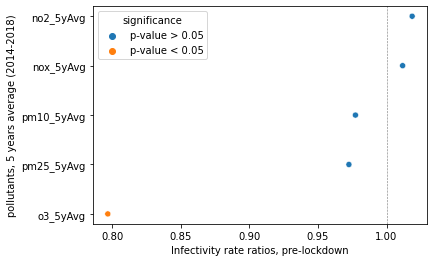

In [152]:
LA_covid_cases_onlyPoll_5YA = LA_covid_cases_onlyPoll_5YA.sort_values(by=['or'], ascending = False)
fig1 = plt.figure()
ax = sns.scatterplot(x="or", y="names", data=LA_covid_cases_onlyPoll_5YA, hue="significance")
#plt.xlim(0.8, 1.6)
plt.axvline(x=1,linestyle ="--", linewidth=0.6, color = 'gray')
plt.xlabel("Infectivity rate ratios, pre-lockdown")
plt.ylabel("pollutants, 5 years average (2014-2018)")
#plt.errorbar('names', 'or')
#ax = plt.scatter(x="names", y="or", data=LA_covid_onlyPoll)


In [ ]:
#april data

In [186]:
april_deaths = pd.read_csv("%s/LA_deaths_April2020.csv" %path_output, usecols = ["Code","april_deaths"])
april_cases = pd.read_csv("%s/COVID_LA_cases.csv" %path_output, usecols = ["lad19_cd","april_26_cases"])
april_cases.columns = ['Code', 'april_cases']
april_cases = april_cases.groupby(['Code']).sum()
april_cases.head()

,april_cases
Code,
E06000001,225
E06000002,500
E06000003,294
E06000004,324
E06000005,252


In [187]:
resub_dt = pd.merge(april_cases, april_deaths, on='Code')
resub_dt = pd.merge(avgAP_dt, resub_dt)
resub_dt = pd.merge(resub_dt, pd.read_csv("%s/merged_covidAir_cov_dt_LA.csv" %path_output, 
                                          usecols = ["Code","pm25_val","no2_val","o3_val","pm10_val","nox_val"]))
resub_dt.shape
#resub_dt.to_csv("data_out/LA_dt_resub_full.csv")
resub_dt.rename(columns={'X2018.people.per.sq..km':'X2018_people_per_sq_km'}, inplace=True)
resub_dt.head()

,Code,deaths,X2018_people_per_sq_km,Mean_ann_earnings,median_age_2018,pm25_5yAvg,no2_5yAvg,o3_5yAvg,pm10_5yAvg,nox_5yAvg,...,age_5ya.y,earnings_5ya,age_5ya,april_cases,april_deaths,pm25_val,no2_val,o3_val,pm10_val,nox_val
0,E06000001,20,997,25985,41.8,7.617912,14.359226,2.811139,11.625292,20.206840,...,41.8,24887.4,41.8,225,63,7.362821,13.105737,5.303858,11.506778,17.730895
1,E06000002,60,2608,22878,36.2,8.342285,20.537653,2.240947,12.522083,30.628742,...,36.4,21543.4,36.4,500,142,8.210540,20.178191,4.251802,12.561928,29.296034
2,E06000003,26,558,23236,45.0,7.748074,8.440613,3.795747,12.845976,11.273613,...,44.7,22960.2,44.7,294,69,7.293137,7.749542,6.851500,12.855827,9.983241
3,E06000004,26,962,26622,40.4,8.038180,16.408541,2.670293,12.169144,23.435384,...,40.3,24847.8,40.3,324,60,7.900856,15.562038,5.050632,12.251130,21.440737
4,E06000005,14,540,26908,43.1,7.368714,12.552449,2.763806,11.199637,17.361185,...,42.6,25761.8,42.6,252,51,7.153221,11.360341,5.198811,11.129635,15.098272


In [197]:
LA_covid_pm25 = smf.glm(formula = "april_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + pm25_val",
                        data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_pm25.summary())
LA_covid_pm10 = smf.glm(formula = "april_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + pm10_val",
                        data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_pm10.summary())
LA_covid_o3 = smf.glm(formula = "april_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + o3_val",
                        data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_o3.summary())
LA_covid_nox = smf.glm(formula = "april_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + nox_val",
                        data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_nox.summary())
LA_covid_no2 = smf.glm(formula = "april_cases ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + no2_val",
                        data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_no2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            april_cases   No. Observations:                  283
Model:                            GLM   Df Residuals:                      278
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1907.3
Date:                Fri, 10 Sep 2021   Deviance:                       138.13
Time:                        14:54:28   Pearson chi2:                     151.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 10

In [198]:
LA_covid_pm25_5yAvg = smf.glm(formula = "april_cases ~ pop_dens_5ya + earnings_5ya + age_5ya + pm25_5yAvg", 
                              data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_pm25_5yAvg.summary())
LA_covid_pm10_5yAvg = smf.glm(formula = "april_cases ~ pop_dens_5ya + earnings_5ya + age_5ya + pm10_5yAvg", 
                              data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_pm10_5yAvg.summary())
LA_covid_nox_5yAvg = smf.glm(formula = "april_cases ~ pop_dens_5ya + earnings_5ya + age_5ya + nox_5yAvg", 
                              data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_nox_5yAvg.summary())
LA_covid_no2_5yAvg = smf.glm(formula = "april_cases ~ pop_dens_5ya + earnings_5ya + age_5ya + no2_5yAvg", 
                              data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_no2_5yAvg.summary())
LA_covid_o3_5yAvg = smf.glm(formula = "april_cases ~ pop_dens_5ya + earnings_5ya + age_5ya + o3_5yAvg", 
                              data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_o3_5yAvg.summary())
#html

                 Generalized Linear Model Regression Results                  
Dep. Variable:            april_cases   No. Observations:                  283
Model:                            GLM   Df Residuals:                      278
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1910.1
Date:                Fri, 10 Sep 2021   Deviance:                       143.80
Time:                        14:55:48   Pearson chi2:                     172.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.0767      0.865     11.643   

In [387]:
pm25 = [LA_covid_pm25.params[4], LA_covid_pm25.bse[4], LA_covid_pm25.tvalues[4], LA_covid_pm25.pvalues[4], np.exp(LA_covid_pm25.params[4]),np.exp(LA_covid_pm25.conf_int()[0][4]),np.exp(LA_covid_pm25.conf_int()[1][4])]
pm10 = [LA_covid_pm10.params[4], LA_covid_pm10.bse[4], LA_covid_pm10.tvalues[4], LA_covid_pm10.pvalues[4], np.exp(LA_covid_pm10.params[4]),np.exp(LA_covid_pm10.conf_int()[0][4]),np.exp(LA_covid_pm10.conf_int()[1][4])]
nox = [LA_covid_nox.params[4], LA_covid_nox.bse[4], LA_covid_nox.tvalues[4], LA_covid_nox.pvalues[4], np.exp(LA_covid_nox.params[4]),np.exp(LA_covid_nox.conf_int()[0][4]),np.exp(LA_covid_nox.conf_int()[1][4])]
no2 = [LA_covid_no2.params[4], LA_covid_no2.bse[4], LA_covid_no2.tvalues[4], LA_covid_no2.pvalues[4], np.exp(LA_covid_no2.params[4]),np.exp(LA_covid_no2.conf_int()[0][4]),np.exp(LA_covid_no2.conf_int()[1][4])]
o3 = [LA_covid_o3.params[4], LA_covid_o3.bse[4], LA_covid_o3.tvalues[4], LA_covid_o3.pvalues[4], np.exp(LA_covid_o3.params[4]),np.exp(LA_covid_o3.conf_int()[0][4]),np.exp(LA_covid_o3.conf_int()[1][4])]
pm25_5yAvg = [LA_covid_pm25_5yAvg.params[4], LA_covid_pm25_5yAvg.bse[4], LA_covid_pm25_5yAvg.tvalues[4], LA_covid_pm25_5yAvg.pvalues[4], np.exp(LA_covid_pm25_5yAvg.params[4]),np.exp(LA_covid_pm25_5yAvg.conf_int()[0][4]),np.exp(LA_covid_pm25_5yAvg.conf_int()[1][4])]
pm10_5yAvg =[LA_covid_pm10_5yAvg.params[4], LA_covid_pm10_5yAvg.bse[4], LA_covid_pm10_5yAvg.tvalues[4], LA_covid_pm10_5yAvg.pvalues[4], np.exp(LA_covid_pm10_5yAvg.params[4]),np.exp(LA_covid_pm10_5yAvg.conf_int()[0][4]),np.exp(LA_covid_pm10_5yAvg.conf_int()[1][4])]
nox_5yAvg = [LA_covid_nox_5yAvg.params[4], LA_covid_nox_5yAvg.bse[4], LA_covid_nox_5yAvg.tvalues[4], LA_covid_nox_5yAvg.pvalues[4], np.exp(LA_covid_nox_5yAvg.params[4]),np.exp(LA_covid_nox_5yAvg.conf_int()[0][4]),np.exp(LA_covid_nox_5yAvg.conf_int()[1][4])]
no2_5yAvg = [LA_covid_no2_5yAvg.params[4], LA_covid_no2_5yAvg.bse[4], LA_covid_no2_5yAvg.tvalues[4], LA_covid_no2_5yAvg.pvalues[4], np.exp(LA_covid_no2_5yAvg.params[4]),np.exp(LA_covid_no2_5yAvg.conf_int()[0][4]),np.exp(LA_covid_no2_5yAvg.conf_int()[1][4])]
o3_5yAvg = [LA_covid_o3_5yAvg.params[4], LA_covid_o3_5yAvg.bse[4], LA_covid_o3_5yAvg.tvalues[4], LA_covid_o3_5yAvg.pvalues[4], np.exp(LA_covid_o3_5yAvg.params[4]),np.exp(LA_covid_o3_5yAvg.conf_int()[0][4]),np.exp(LA_covid_o3_5yAvg.conf_int()[1][4])]
 
list_dt_full = pd.DataFrame([pm25, pm10, nox, no2, o3, pm25_5yAvg, pm10_5yAvg, nox_5yAvg, no2_5yAvg, o3_5yAvg], columns =['estimate','std error','z value', 'pvalue', 'or', 'lower', 'upper'])
list_dt_full['pollutants'] = ['pm25', 'pm10', 'nox', 'no2', 'o3', 'pm25_5yAvg', 'pm10_5yAvg', 'nox_5yAvg', 'no2_5yAvg', 'o3_5yAvg']
list_dt_full.set_index('pollutants', inplace=True)
list_dt_full['significance'] = np.where(list_dt_full['pvalue']>0.05, 'pvalue > 0.05', 'pvalue < 0.05')
list_dt_full
list_dt_full.to_csv("data_out/LA_covidInfection_RRs_fullData_resub.csv")

Text(0, 0.5, 'pollutants')

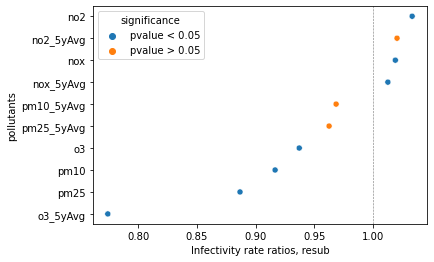

In [388]:
list_dt_full = list_dt_full.sort_values(by=['or'], ascending = False)
fig1 = plt.figure()
ax = sns.scatterplot(x="or", y="pollutants", data=list_dt_full, hue="significance")
#plt.xlim(0.8, 1.6)
plt.axvline(x=1,linestyle ="--", linewidth=0.6, color = 'gray')
plt.xlabel("Infectivity rate ratios, resub")
plt.ylabel("pollutants")
#plt.errorbar('names', 'or')
#ax = plt.scatter(x="names", y="or", data=LA_covid_onlyPoll)


In [390]:
#deaths data
LA_covid_pm25 = smf.glm(formula = "april_deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + pm25_val",
                        data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_pm25.summary())
LA_covid_pm10 = smf.glm(formula = "april_deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + pm10_val",
                        data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_pm10.summary())
LA_covid_o3 = smf.glm(formula = "april_deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + o3_val",
                        data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_o3.summary())
LA_covid_nox = smf.glm(formula = "april_deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + nox_val",
                        data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_nox.summary())
LA_covid_no2 = smf.glm(formula = "april_deaths ~ X2018_people_per_sq_km + Mean_ann_earnings + median_age_2018 + no2_val",
                        data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_no2.summary())
LA_covid_pm25_5yAvg = smf.glm(formula = "april_deaths ~ pop_dens_5ya + earnings_5ya + age_5ya + pm25_5yAvg", 
                              data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_pm25_5yAvg.summary())
LA_covid_pm10_5yAvg = smf.glm(formula = "april_deaths ~ pop_dens_5ya + earnings_5ya + age_5ya + pm10_5yAvg", 
                              data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_pm10_5yAvg.summary())
LA_covid_nox_5yAvg = smf.glm(formula = "april_deaths ~ pop_dens_5ya + earnings_5ya + age_5ya + nox_5yAvg", 
                              data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_nox_5yAvg.summary())
LA_covid_no2_5yAvg = smf.glm(formula = "april_deaths ~ pop_dens_5ya + earnings_5ya + age_5ya + no2_5yAvg", 
                              data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_no2_5yAvg.summary())
LA_covid_o3_5yAvg = smf.glm(formula = "april_deaths ~ pop_dens_5ya + earnings_5ya + age_5ya + o3_5yAvg", 
                              data = resub_dt, family=sm.families.NegativeBinomial()).fit()
print(LA_covid_o3_5yAvg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           april_deaths   No. Observations:                  283
Model:                            GLM   Df Residuals:                      278
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1591.8
Date:                Fri, 10 Sep 2021   Deviance:                       113.54
Time:                        16:49:22   Pearson chi2:                     135.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8

                 Generalized Linear Model Regression Results                  
Dep. Variable:           april_deaths   No. Observations:                  283
Model:                            GLM   Df Residuals:                      278
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1592.7
Date:                Fri, 10 Sep 2021   Deviance:                       115.45
Time:                        16:49:22   Pearson chi2:                     146.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.4655      0.868      8.598   

In [393]:
pm25 = [LA_covid_pm25.params[4], LA_covid_pm25.bse[4], LA_covid_pm25.tvalues[4], LA_covid_pm25.pvalues[4], np.exp(LA_covid_pm25.params[4]),np.exp(LA_covid_pm25.conf_int()[0][4]),np.exp(LA_covid_pm25.conf_int()[1][4])]
pm10 = [LA_covid_pm10.params[4], LA_covid_pm10.bse[4], LA_covid_pm10.tvalues[4], LA_covid_pm10.pvalues[4], np.exp(LA_covid_pm10.params[4]),np.exp(LA_covid_pm10.conf_int()[0][4]),np.exp(LA_covid_pm10.conf_int()[1][4])]
nox = [LA_covid_nox.params[4], LA_covid_nox.bse[4], LA_covid_nox.tvalues[4], LA_covid_nox.pvalues[4], np.exp(LA_covid_nox.params[4]),np.exp(LA_covid_nox.conf_int()[0][4]),np.exp(LA_covid_nox.conf_int()[1][4])]
no2 = [LA_covid_no2.params[4], LA_covid_no2.bse[4], LA_covid_no2.tvalues[4], LA_covid_no2.pvalues[4], np.exp(LA_covid_no2.params[4]),np.exp(LA_covid_no2.conf_int()[0][4]),np.exp(LA_covid_no2.conf_int()[1][4])]
o3 = [LA_covid_o3.params[4], LA_covid_o3.bse[4], LA_covid_o3.tvalues[4], LA_covid_o3.pvalues[4], np.exp(LA_covid_o3.params[4]),np.exp(LA_covid_o3.conf_int()[0][4]),np.exp(LA_covid_o3.conf_int()[1][4])]
pm25_5yAvg = [LA_covid_pm25_5yAvg.params[4], LA_covid_pm25_5yAvg.bse[4], LA_covid_pm25_5yAvg.tvalues[4], LA_covid_pm25_5yAvg.pvalues[4], np.exp(LA_covid_pm25_5yAvg.params[4]),np.exp(LA_covid_pm25_5yAvg.conf_int()[0][4]),np.exp(LA_covid_pm25_5yAvg.conf_int()[1][4])]
pm10_5yAvg =[LA_covid_pm10_5yAvg.params[4], LA_covid_pm10_5yAvg.bse[4], LA_covid_pm10_5yAvg.tvalues[4], LA_covid_pm10_5yAvg.pvalues[4], np.exp(LA_covid_pm10_5yAvg.params[4]),np.exp(LA_covid_pm10_5yAvg.conf_int()[0][4]),np.exp(LA_covid_pm10_5yAvg.conf_int()[1][4])]
nox_5yAvg = [LA_covid_nox_5yAvg.params[4], LA_covid_nox_5yAvg.bse[4], LA_covid_nox_5yAvg.tvalues[4], LA_covid_nox_5yAvg.pvalues[4], np.exp(LA_covid_nox_5yAvg.params[4]),np.exp(LA_covid_nox_5yAvg.conf_int()[0][4]),np.exp(LA_covid_nox_5yAvg.conf_int()[1][4])]
no2_5yAvg = [LA_covid_no2_5yAvg.params[4], LA_covid_no2_5yAvg.bse[4], LA_covid_no2_5yAvg.tvalues[4], LA_covid_no2_5yAvg.pvalues[4], np.exp(LA_covid_no2_5yAvg.params[4]),np.exp(LA_covid_no2_5yAvg.conf_int()[0][4]),np.exp(LA_covid_no2_5yAvg.conf_int()[1][4])]
o3_5yAvg = [LA_covid_o3_5yAvg.params[4], LA_covid_o3_5yAvg.bse[4], LA_covid_o3_5yAvg.tvalues[4], LA_covid_o3_5yAvg.pvalues[4], np.exp(LA_covid_o3_5yAvg.params[4]),np.exp(LA_covid_o3_5yAvg.conf_int()[0][4]),np.exp(LA_covid_o3_5yAvg.conf_int()[1][4])]
 
list_dt_full = pd.DataFrame([pm25, pm10, nox, no2, o3, pm25_5yAvg, pm10_5yAvg, nox_5yAvg, no2_5yAvg, o3_5yAvg], columns =['estimate','std error','z value', 'pvalue', 'or', 'lower', 'upper'])
list_dt_full['pollutants'] = ['pm25', 'pm10', 'nox', 'no2', 'o3', 'pm25_5yAvg', 'pm10_5yAvg', 'nox_5yAvg', 'no2_5yAvg', 'o3_5yAvg']
list_dt_full.set_index('pollutants', inplace=True)
list_dt_full['significance'] = np.where(list_dt_full['pvalue']>0.05, 'pvalue > 0.05', 'pvalue < 0.05')
list_dt_full
#list_dt_full.to_csv("data_out/LA_covidDEATHSInfection_RRs_fullData_resub.csv")

,estimate,std error,z value,pvalue,or,lower,upper,significance
pollutants,,,,,,,,
pm25,-0.060180,0.046409,-1.296734,0.194723,0.941595,0.859727,1.031259,pvalue > 0.05
pm10,-0.046903,0.029736,-1.577299,0.114727,0.954180,0.900158,1.011444,pvalue > 0.05
nox,0.017611,0.008882,1.982874,0.047381,1.017767,1.000203,1.035639,pvalue < 0.05
no2,0.030469,0.015281,1.993973,0.046155,1.030938,1.000520,1.062281,pvalue < 0.05
o3,-0.042215,0.018881,-2.235806,0.025365,0.958663,0.923834,0.994805,pvalue < 0.05
pm25_5yAvg,0.005270,0.028347,0.185914,0.852512,1.005284,0.950954,1.062718,pvalue > 0.05
pm10_5yAvg,0.000264,0.019971,0.013199,0.989469,1.000264,0.961867,1.040193,pvalue > 0.05
nox_5yAvg,0.015559,0.006276,2.479080,0.013172,1.015681,1.003263,1.028252,pvalue < 0.05
no2_5yAvg,0.025447,0.010545,2.413109,0.015817,1.025773,1.004790,1.047195,pvalue < 0.05


Text(0, 0.5, 'pollutants')

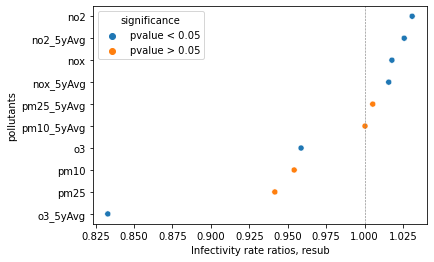

In [394]:
list_dt_full = list_dt_full.sort_values(by=['or'], ascending = False)
fig1 = plt.figure()
ax = sns.scatterplot(x="or", y="pollutants", data=list_dt_full, hue="significance")
#plt.xlim(0.8, 1.6)
plt.axvline(x=1,linestyle ="--", linewidth=0.6, color = 'gray')
plt.xlabel("Infectivity rate ratios, resub")
plt.ylabel("pollutants")
#plt.errorbar('names', 'or')
#ax = plt.scatter(x="names", y="or", data=LA_covid_onlyPoll)
